# Comparación de coordenadas de los códigos QR

Entre las coordenadas por defecto / de los exámenes sin alteraciones y de los exámenes escaneados

In [1]:
import numpy as np
import json

from my_functions import get_trans #, get_rotation # called by get_trans
from pyex_scan import find_qrs_v1

# Ficheros

directorio base

In [2]:
base_dir = '../multiple_choice_example/'

examenes escaneados y rellenados

In [3]:
# scanned exams 1 and 2
ex_file1 = base_dir + 'scanned/scanned_11111.pdf'
ex_file2 = base_dir + 'scanned/scanned_22222.pdf'

# scanned 2 rotated by 45º, 90º and 180º
ex_file2_rot45 = base_dir + 'scanned/scanned_22222_rot45.pdf'
ex_file2_rot90 = base_dir + 'scanned/scanned_22222_rot90.pdf'
ex_file2_rot180 = base_dir + 'scanned/scanned_22222_rot180.pdf'

# filled exams 3 and 4
ex_file3 = base_dir + 'filled/filled_33333.pdf'
ex_file4 = base_dir + 'filled/filled_44444.pdf'

# filled 3 rotated by 90º and 180º
ex_file3_rot90 = base_dir + 'filled/filled_33333_rot90.pdf'
ex_file3_rot180 = base_dir + 'filled/filled_33333_rot180.pdf'

dots per inch

In [4]:
dpi = 300

# QR recognition

Test of QR recognition in rotated files

### Filled exam

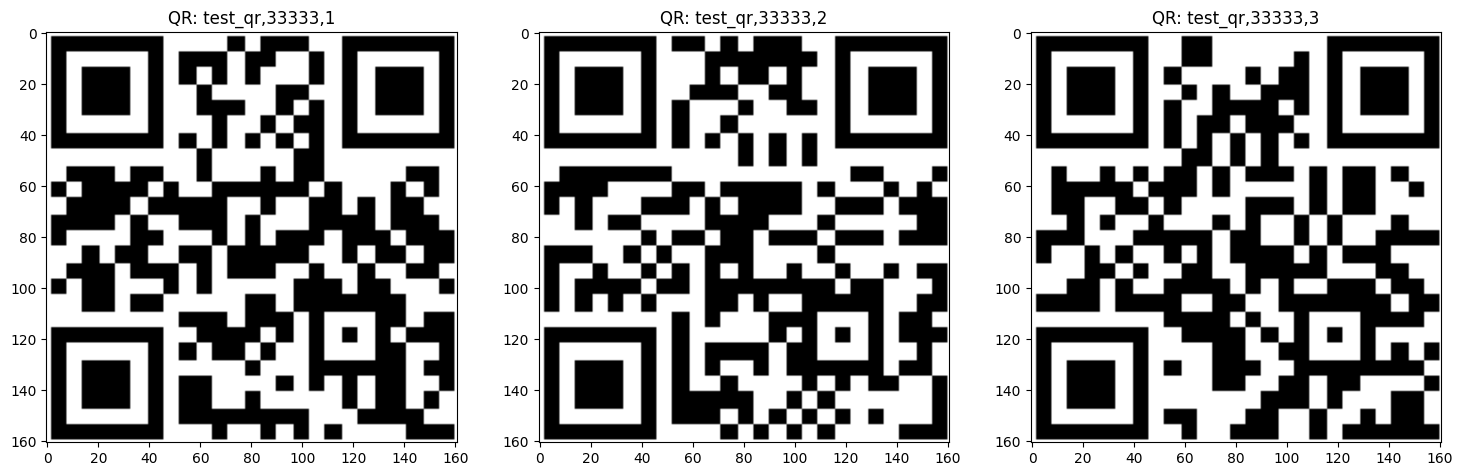

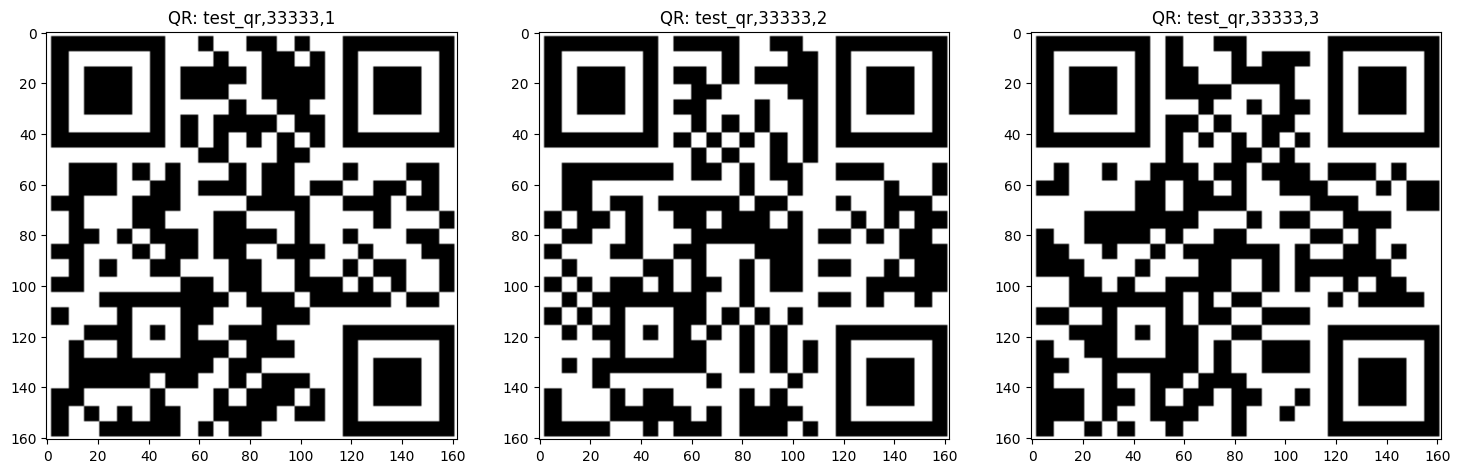

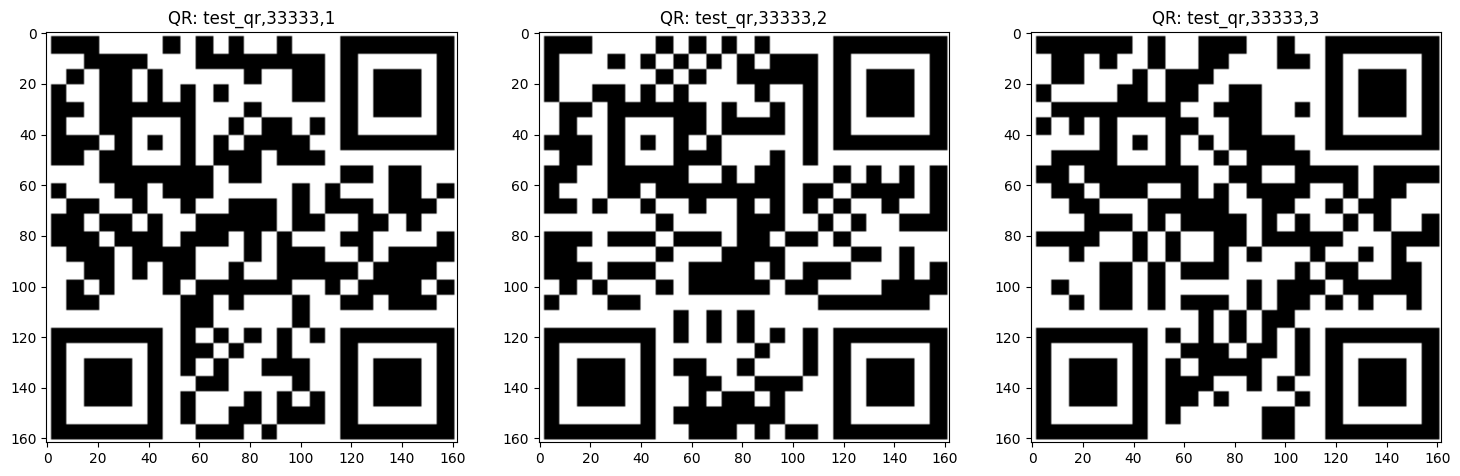

In [5]:
qrs3 = find_qrs_v1(ex_file3, dpi=dpi)
qrs3_rot90 = find_qrs_v1(ex_file3_rot90, dpi=dpi)
qrs3_rot180 = find_qrs_v1(ex_file3_rot180, dpi=dpi)

In [19]:
qrs3, qrs3_rot90, qrs3_rot180

([{'exam': 'test_qr',
   'variant': '33333',
   'page': '1',
   'coordinates': array([[[1950.0001, 3174.    ],
           [2107.    , 3174.    ],
           [2107.    , 3331.    ],
           [1950.0001, 3331.    ]]], dtype=float32)},
  {'exam': 'test_qr',
   'variant': '33333',
   'page': '2',
   'coordinates': array([[[1950.0001, 3174.    ],
           [2107.    , 3174.    ],
           [2107.    , 3331.    ],
           [1950.0001, 3331.    ]]], dtype=float32)},
  {'exam': 'test_qr',
   'variant': '33333',
   'page': '3',
   'coordinates': array([[[1950.0001, 3174.    ],
           [2107.    , 3174.    ],
           [2107.    , 3331.    ],
           [1950.0001, 3331.    ]]], dtype=float32)}],
 [{'exam': 'test_qr',
   'variant': '33333',
   'page': '1',
   'coordinates': array([[[ 333., 1950.],
           [ 333., 2107.],
           [ 175., 2107.],
           [ 175., 1950.]]], dtype=float32)},
  {'exam': 'test_qr',
   'variant': '33333',
   'page': '2',
   'coordinates': array([[[ 33

In [23]:
qrs3[0]['coordinates'], qrs3[0]['coordinates'] / dpi

(array([[[1950.0001, 3174.    ],
         [2107.    , 3174.    ],
         [2107.    , 3331.    ],
         [1950.0001, 3331.    ]]], dtype=float32),
 array([[[ 6.5000005, 10.58     ],
         [ 7.0233335, 10.58     ],
         [ 7.0233335, 11.103333 ],
         [ 6.5000005, 11.103333 ]]], dtype=float32))

In [26]:
aux = [[6.5, 10.58], [7.25, 10.58], [7.25, 11.105], [6.5, 11,105]]
aux2 = [[j * dpi for j in i] for i in aux]
aux, aux2

([[6.5, 10.58], [7.25, 10.58], [7.25, 11.105], [6.5, 11, 105]],
 [[1950.0, 3174.0], [2175.0, 3174.0], [2175.0, 3331.5], [1950.0, 3300, 31500]])

### Scanned exam

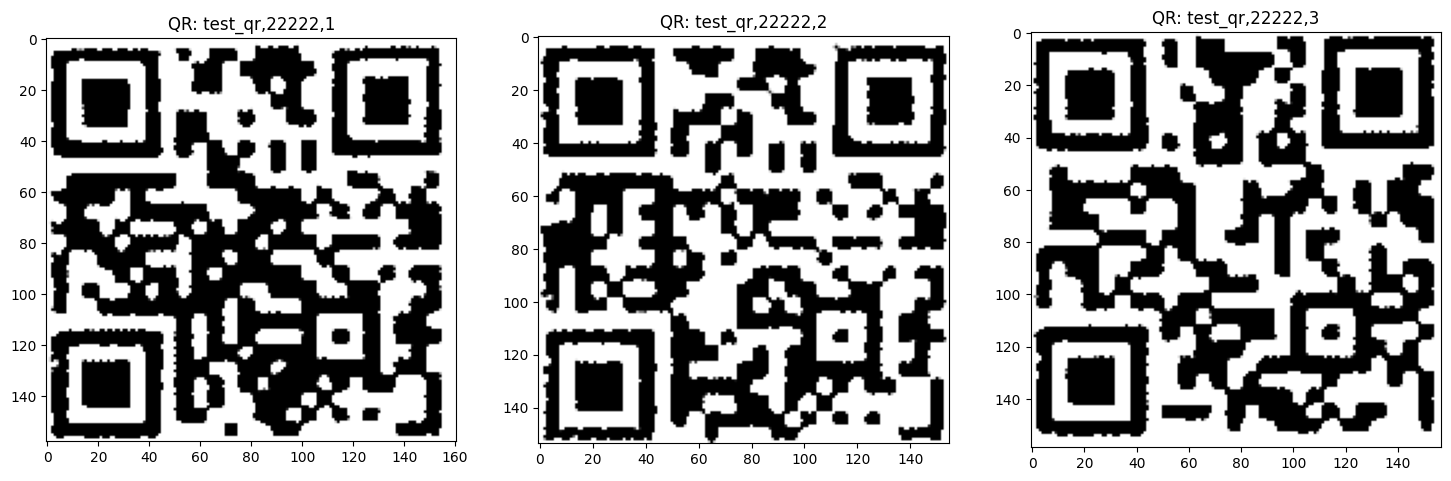

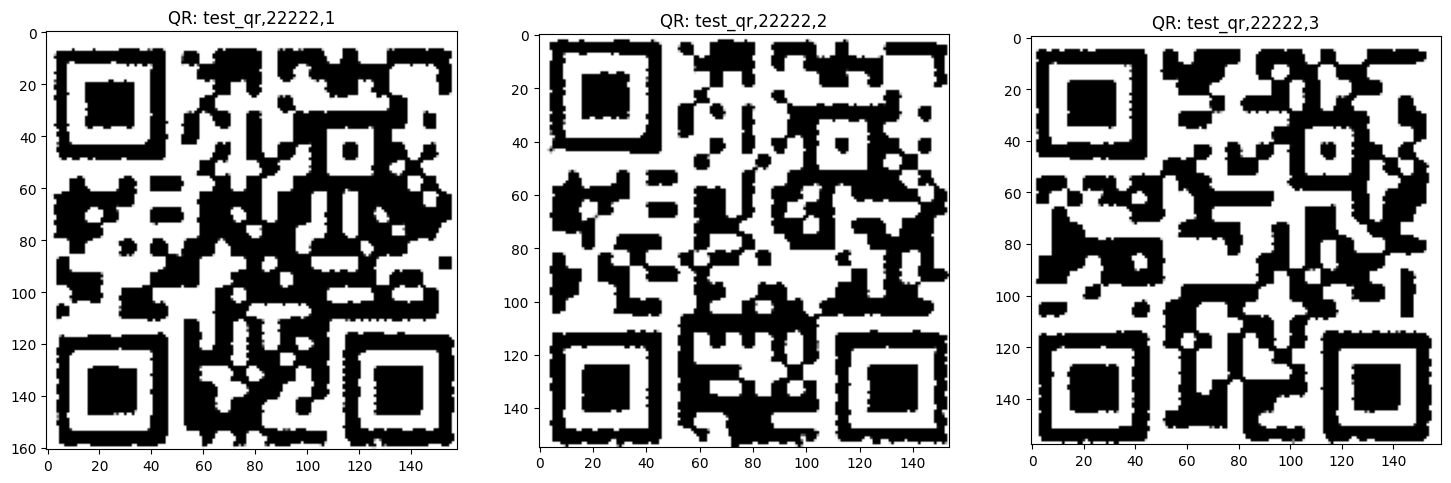

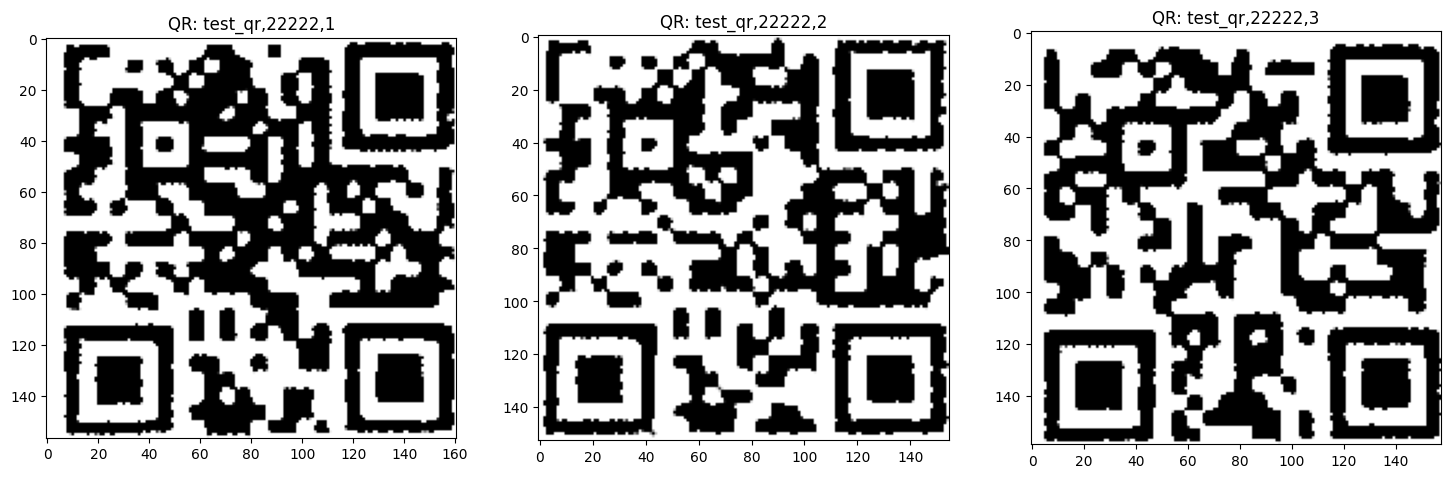

In [6]:
qrs2 = find_qrs_v1(ex_file2, dpi=dpi)
qrs2_rot90 = find_qrs_v1(ex_file2_rot90, dpi=dpi)
qrs2_rot180 = find_qrs_v1(ex_file2_rot180, dpi=dpi)

In [20]:
qrs2, qrs2_rot90, qrs2_rot180

([{'exam': 'test_qr',
   'variant': '22222',
   'page': '1',
   'coordinates': array([[[1891.    , 3100.111 ],
           [2042.7262, 3098.004 ],
           [2048.    , 3252.    ],
           [1893.    , 3252.    ]]], dtype=float32)},
  {'exam': 'test_qr',
   'variant': '22222',
   'page': '2',
   'coordinates': array([[[1924.    , 3060.    ],
           [2074.    , 3057.602 ],
           [2074.    , 3206.9768],
           [1923.    , 3207.    ]]], dtype=float32)},
  {'exam': 'test_qr',
   'variant': '22222',
   'page': '3',
   'coordinates': array([[[1895.    , 3098.    ],
           [2045.9805, 3096.    ],
           [2048.9998, 3251.    ],
           [1897.    , 3247.    ]]], dtype=float32)}],
 [{'exam': 'test_qr',
   'variant': '22222',
   'page': '1',
   'coordinates': array([[[3100.111  ,  571.     ],
           [3098.004  ,  419.27383],
           [3252.     ,  414.     ],
           [3252.     ,  569.     ]]], dtype=float32)},
  {'exam': 'test_qr',
   'variant': '22222',
   'pa

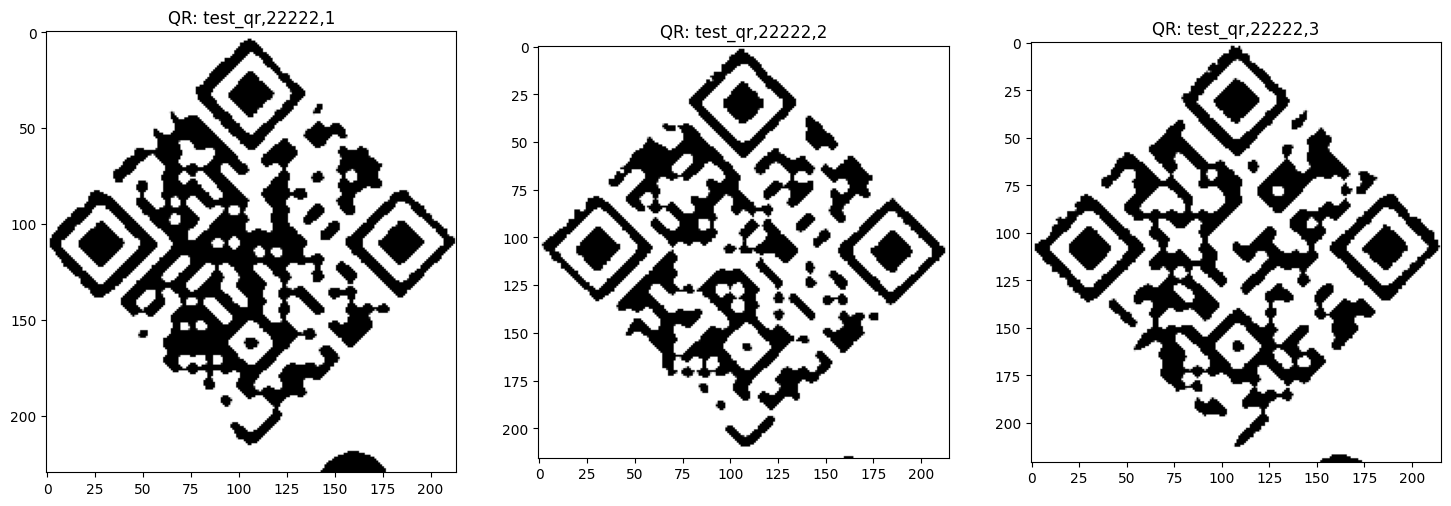

In [7]:
qrs2_rot45 = find_qrs_v1(ex_file2_rot45, dpi=dpi)

## Coordinates comparison in the QRs

To compare the coordinates of each point, use a function to extract them from the dictionary

In [8]:
def get_coords(qr_codes):
    """
    Extracts the coordinates in the dictionaries in qr_codes
    :param qr_codes:
    :return: coordinates numpy array
    """
    cords = []
    for qr in qr_codes:
        for point in qr['coordinates'][0]:
            cords.append(point)
    return np.array(cords)

In [9]:
# Coordinates in scanned exam 2
qrs2_coords_page1, qrs2_coords_page2, qrs2_coords_page3 = (get_coords(qrs2)[i:i+4] for i in range(0,12,4))
qrs2_45_coords_page1, qrs2_45_coords_page2, qrs2_45_coords_page3 = (get_coords(qrs2_rot45)[i:i+4] for i in range(0,12,4))
qrs2_90_coords_page1, qrs2_90_coords_page2, qrs2_90_coords_page3 = (get_coords(qrs2_rot90)[i:i+4] for i in range(0,12,4))
qrs2_180_coords_page1, qrs2_180_coords_page2, qrs2_180_coords_page3 = (get_coords(qrs2_rot180)[i:i+4] for i in range(0,12,4))

# Coordinates in filled exam 3
qrs3_coords_page1, qrs3_coords_page2, qrs3_coords_page3 = (get_coords(qrs3)[i:i+4] for i in range(0,12,4))
qrs3_90_coords_page1, qrs3_90_coords_page2, qrs3_90_coords_page3 = (get_coords(qrs3_rot90)[i:i+4] for i in range(0,12,4))
qrs3_180_coords_page1, qrs3_180_coords_page2, qrs3_180_coords_page3 = (get_coords(qrs3_rot180)[i:i+4] for i in range(0,12,4))

# Default coordinates are the same as in the filled 2 exam
default_qr_coords = qrs3_coords_page1

compare the default coordinates to the coordinates of each page

In [10]:
# transformation in scanned 2
trans2_page1, trans2_page2, trans2_page3 = (get_trans(default_qr_coords, x) for x in (qrs2_coords_page1, qrs2_coords_page2, qrs2_coords_page3))
trans2_45_page1, trans2_45_page2, trans2_45_page3 = (get_trans(default_qr_coords, x) for x in (qrs2_45_coords_page1, qrs2_45_coords_page2, qrs2_45_coords_page3))
trans2_90_page1, trans2_90_page2, trans2_90_page3 = (get_trans(default_qr_coords, x) for x in (qrs2_90_coords_page1, qrs2_90_coords_page2, qrs2_90_coords_page3))
trans2_180_page1, trans2_180_page2, trans2_180_page3 = (get_trans(default_qr_coords, x) for x in (qrs2_180_coords_page1, qrs2_180_coords_page2, qrs2_180_coords_page3))

# transformation in filled 3
trans3_page1, trans3_page2, trans3_page3 = (get_trans(default_qr_coords, x) for x in (qrs3_coords_page1, qrs3_coords_page2, qrs3_coords_page3))
trans3_90_page1, trans3_90_page2, trans3_90_page3 = (get_trans(default_qr_coords, x) for x in (qrs3_90_coords_page1, qrs3_90_coords_page2, qrs3_90_coords_page3))
trans3_180_page1, trans3_180_page2, trans3_180_page3 = (get_trans(default_qr_coords, x) for x in (qrs3_180_coords_page1, qrs3_180_coords_page2, qrs3_180_coords_page3))

In [11]:
def print_trans(trans_page1, trans_page2, trans_page3):
    print("| x0 | y0 | alpha | scale |")
    print("| --- | --- | --- | --- |")
    print("| %.2f | %.2f | %.2f | %.2f |" % (trans_page1[0][0], trans_page1[0][1], trans_page1[1], trans_page1[2]))
    print("| %.2f | %.2f | %.2f | %.2f |" % (trans_page2[0][0], trans_page2[0][1], trans_page2[1], trans_page2[2]))
    print("| %.2f | %.2f | %.2f | %.2f |" % (trans_page3[0][0], trans_page3[0][1], trans_page3[1], trans_page3[2]))

Scanned 2 regular

In [12]:
print_trans(trans2_page1, trans2_page2, trans2_page3)

| x0 | y0 | alpha | scale |
| --- | --- | --- | --- |
| -58.88 | 32.81 | -0.88 | 0.98 |
| 61.88 | 43.40 | -0.13 | 0.95 |
| -4.78 | 38.56 | -0.28 | 0.97 |


Scanned 2 45 degrees rotated

In [13]:
print_trans(trans2_45_page1, trans2_45_page2, trans2_45_page3)

| x0 | y0 | alpha | scale |
| --- | --- | --- | --- |
| 2196.51 | -328.51 | 44.61 | 0.98 |
| 2200.13 | -261.68 | 45.76 | 0.95 |
| 2182.95 | -299.73 | 45.53 | 0.97 |


Scanned 2 90 degrees rotated

In [14]:
print_trans(trans2_90_page1, trans2_90_page2, trans2_90_page3)

| x0 | y0 | alpha | scale |
| --- | --- | --- | --- |
| 32.81 | 2520.88 | -90.88 | 0.98 |
| 42.40 | 2401.12 | -90.13 | 0.95 |
| 38.56 | 2466.78 | -90.28 | 0.97 |


Scanned 2 180 degrees rotated

In [15]:
print_trans(trans2_180_page1, trans2_180_page2, trans2_180_page3)

| x0 | y0 | alpha | scale |
| --- | --- | --- | --- |
| 2517.57 | 3418.06 | 179.31 | 0.98 |
| 2401.12 | 3391.60 | 179.87 | 0.95 |
| 2466.78 | 3395.44 | 179.72 | 0.97 |


Filled 3 regular

In [16]:
print_trans(trans3_page1, trans3_page2, trans3_page3)

| x0 | y0 | alpha | scale |
| --- | --- | --- | --- |
| 0.00 | 0.00 | 0.00 | 1.00 |
| 0.00 | 0.00 | 0.00 | 1.00 |
| 0.00 | 0.00 | 0.00 | 1.00 |


Filled 3 90 degrees rotated

In [17]:
print_trans(trans3_90_page1, trans3_90_page2, trans3_90_page3)

| x0 | y0 | alpha | scale |
| --- | --- | --- | --- |
| 3516.86 | -6.46 | 90.00 | 1.00 |
| 3516.86 | -6.46 | 90.00 | 1.00 |
| 3516.86 | -6.46 | 90.00 | 1.00 |


Filled 3 180 degrees rotated

In [18]:
print_trans(trans3_180_page1, trans3_180_page2, trans3_180_page3)

| x0 | y0 | alpha | scale |
| --- | --- | --- | --- |
| 2492.42 | 3527.22 | 180.00 | 1.01 |
| 2492.42 | 3527.22 | 180.00 | 1.01 |
| 2492.42 | 3527.22 | 180.00 | 1.01 |


In [27]:
aux = [1.053333, 0.97, 7.21, 11.03]
aux2 = [i * dpi for i in aux]
aux, aux2

([1.053333, 0.97, 7.21, 11.03], [315.9999, 291.0, 2163.0, 3309.0])